In [ ]:
import pandas as pd
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
feature_names=df.columns

In [ ]:
feature_names

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df['heart_disease'].isnull

<bound method Series.isnull of 0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: heart_disease, Length: 5110, dtype: int64>

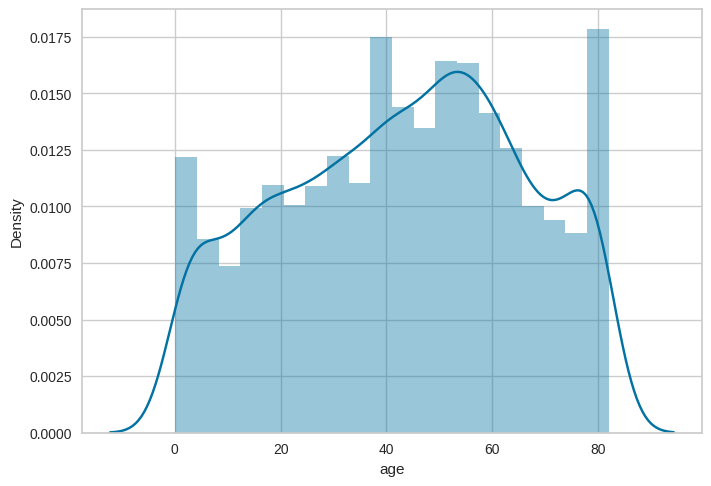

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['age'])
plt.show()

In [41]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 91.1 MB/s eta 0:0

In [26]:
from  pycaret.classification import *

In [43]:
s=setup(df,target='stroke',session_id=123,transformation=True,normalize=True)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(5110, 12)"
4,Transformed data shape,"(5110, 21)"
5,Transformed train set shape,"(3577, 21)"
6,Transformed test set shape,"(1533, 21)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


In [29]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6953,0.7577,0.6953,0.5777,0.5982,0.3876,0.4682,1.4900
gbc,Gradient Boosting Classifier,0.6861,0.7544,0.6861,0.5863,0.6048,0.3856,0.4409,4.5270
rf,Random Forest Classifier,0.6763,0.7260,0.6763,0.5651,0.5934,0.3663,0.4180,1.3570
lda,Linear Discriminant Analysis,0.6707,0.7431,0.6707,0.5574,0.5920,0.3673,0.4106,0.6180
ridge,Ridge Classifier,0.6679,0.0000,0.6679,0.5331,0.5590,0.3328,0.4070,0.4860
svm,SVM - Linear Kernel,0.6654,0.0000,0.6654,0.5608,0.5850,0.3519,0.3992,0.3990
et,Extra Trees Classifier,0.6581,0.7168,0.6581,0.5697,0.5929,0.3497,0.3810,1.3870
knn,K Neighbors Classifier,0.6151,0.6820,0.6151,0.5563,0.5720,0.2955,0.3100,0.5190
dummy,Dummy Classifier,0.5725,0.5000,0.5725,0.3278,0.4169,0.0000,0.0000,0.3610
dt,Decision Tree Classifier,0.5594,0.6385,0.5594,0.5718,0.5648,0.2950,0.2956,0.3590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [44]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
rf_base_model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6844,0.7180,0.6844,0.5893,0.6040,0.3791,0.4352
1,0.6844,0.7374,0.6844,0.6153,0.6133,0.3957,0.4363
2,0.6648,0.7226,0.6648,0.5256,0.5772,0.3420,0.3921
3,0.6732,0.7469,0.6732,0.5526,0.5894,0.3587,0.4106
4,0.6732,0.7298,0.6732,0.5345,0.5850,0.3633,0.4118
5,0.6899,0.7250,0.6899,0.5608,0.6016,0.3915,0.4492
6,0.6816,0.7067,0.6816,0.5675,0.5950,0.3698,0.4310
7,0.6667,0.7222,0.6667,0.5435,0.5849,0.3490,0.3947
8,0.6779,0.7408,0.6779,0.5826,0.5952,0.3614,0.4219


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
tuned_rf_model=tune_model(rf_base_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7011,0.7578,0.7011,0.5036,0.5837,0.3914,0.4933
1,0.6927,0.7606,0.6927,0.4963,0.5761,0.3759,0.4712
2,0.6899,0.7520,0.6899,0.4958,0.5742,0.3670,0.4649
3,0.6816,0.7249,0.6816,0.4881,0.5668,0.3532,0.4424
4,0.6983,0.7473,0.6983,0.5039,0.5817,0.3810,0.4883
5,0.6955,0.7469,0.6955,0.5016,0.5796,0.3769,0.4801
6,0.6983,0.7590,0.6983,0.5034,0.5818,0.3826,0.4874
7,0.6975,0.7562,0.6975,0.5014,0.5813,0.3839,0.4800
8,0.6975,0.7935,0.6975,0.5085,0.5829,0.3772,0.4896


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [38]:
final_rf_model=finalize_model(tuned_rf_model)
final_rf_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'age', 'hypertension',
                                             'heart_disease',
                                             'avg_glucose_level', 'bmi',
                                             'stroke'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=6, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.002,
                                        min_samples_leaf=3, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=40, n_jobs=-1,
                                        oob_score=False, random_state=True,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [45]:
save_model(final_rf_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'age', 'hypertension',
                                              'heart_disease',
                                              'avg_glucose_level', 'bmi',
                                              'stroke'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=6, max_features='sqrt',
                 